## 박사님 정답 
## 아이리스 붖꽃데이터
## 1.모델선정(QDA&LDA) 2.confusion matrix 3.Classification report 4. ROC 만들기 

In [12]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

model1 = QuadraticDiscriminantAnalysis().fit(X, y)
model2 = LinearDiscriminantAnalysis().fit(X, y)
yhat1 = model1.predict(X)
yhat2 = model2.predict(X)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [16]:
confusion_matrix(y, yhat1)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [17]:
confusion_matrix(y, yhat2)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [18]:
print(classification_report(y, yhat1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [19]:
print(classification_report(y, yhat2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [20]:
from sklearn.preprocessing import label_binarize
y_multi = label_binarize(y, classes=[0, 1, 2]) ## 인코딩: 0,1,2클래스를 가진집합을 one hot encoing 해줌 

In [29]:
y_multi[:,2]## 3열 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
d1_multi = model1.decision_function(X)## QDA odel1 추정치y 
d2_multi = model2.decision_function(X)## LDA model2 추정치 y
d1_multi[:,2] ## 3열 

array([ -8.81030374e+01,  -7.36225579e+01,  -7.68821571e+01,
        -6.69557801e+01,  -8.86535559e+01,  -8.82841259e+01,
        -7.36444148e+01,  -8.03571458e+01,  -6.30178621e+01,
        -7.50043896e+01,  -9.60375858e+01,  -7.37819038e+01,
        -7.44182128e+01,  -7.50281213e+01,  -1.26618846e+02,
        -1.17891728e+02,  -1.02990529e+02,  -8.51614224e+01,
        -9.50043760e+01,  -8.95211016e+01,  -8.16734184e+01,
        -8.38089388e+01,  -9.48518611e+01,  -6.55817049e+01,
        -6.55584160e+01,  -6.90577621e+01,  -7.14766316e+01,
        -8.66834536e+01,  -8.78862065e+01,  -6.76847885e+01,
        -6.72668123e+01,  -8.32819741e+01,  -1.07705391e+02,
        -1.17189723e+02,  -7.50043896e+01,  -8.65121962e+01,
        -1.01143178e+02,  -7.50043896e+01,  -6.77535285e+01,
        -8.22981353e+01,  -8.66322279e+01,  -5.83642526e+01,
        -7.18328763e+01,  -6.86578589e+01,  -7.40067047e+01,
        -6.90818382e+01,  -8.94818354e+01,  -7.19934786e+01,
        -9.38849721e+01,

In [25]:
fpr10, tpr10, thresholds10 = roc_curve(y_multi[:, 0], d1_multi[:, 0]) ## QDA model로 추정한 클래스 0인 x와 추정치 y의 ROC_curve 값들 
fpr11, tpr11, thresholds11 = roc_curve(y_multi[:, 1], d1_multi[:, 1])
fpr12, tpr12, thresholds12 = roc_curve(y_multi[:, 2], d1_multi[:, 2])
fpr20, tpr20, thresholds20 = roc_curve(y_multi[:, 0], d2_multi[:, 0])## LDA model로 추정한 클래스 0인 x와 추정치 y의 ROC_curve 값들 
fpr21, tpr21, thresholds21 = roc_curve(y_multi[:, 1], d2_multi[:, 1])
fpr22, tpr22, thresholds22 = roc_curve(y_multi[:, 2], d2_multi[:, 2])## LDA model로 추정한 클래스 2인 x와 추정치 y의 ROC_curve 값들 

In [36]:
fpr10,tpr10,thresholds10 
## fpr = false positive rate of predictions
## tpr = true positive rate of predictions 
## thresholds = ?

(array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  0.62,  1.  ]),
 array([ 0.02,  0.46,  0.52,  1.  ,  1.  ,  1.  ,  1.  ]),
 array([   5.27265503,    4.11693852,    4.03309143,   -0.89554967,
        -292.4961253 , -292.90291322, -615.09706153]))

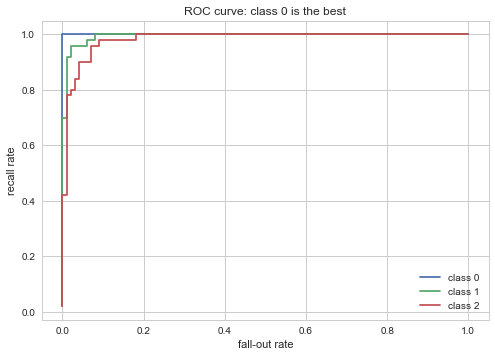

In [40]:
plt.plot(fpr10, tpr10, label="class 0")
plt.plot(fpr11, tpr11, label="class 1")
plt.plot(fpr12, tpr12, label="class 2")
plt.legend()
plt.xlabel("fall-out rate")
plt.ylabel("recall rate")
plt.title("ROC curve of QDA model: class 0 is the best") ## class 0 이 최고의 선택임 
plt.show()

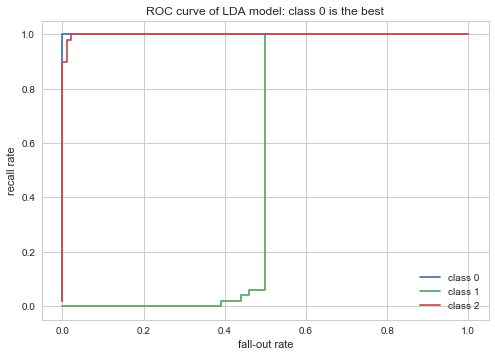

In [45]:
plt.plot(fpr20, tpr20, label="class 0") ## LDA 추정치 Y의 클래스 0 = 클래스 0이 최고의 선택
plt.plot(fpr21, tpr21, label="class 1") ## LDA 추정치 Y의 클래스 1
plt.plot(fpr22, tpr22, label="class 2") ## LDA 추정치 Y의 클래스 2
plt.legend()
plt.xlabel("fall-out rate")
plt.ylabel("recall rate")
plt.title("ROC curve of LDA model: class 0 is the best") ## class 0 이 최고의 선택임 
plt.show()
 ## LDA 모델이 좀더 극명한 값을 보여준다 


In [42]:
from sklearn.metrics import auc ## AUC : ROC 커브의 면적 

In [47]:
auc(fpr10, tpr10), auc(fpr11, tpr11), auc(fpr12, tpr12)
## 클래스 1의 면적은 1 = ROC 커브가 제일 높다 = fall out 대비 recall rate 가 높다 = 신뢰가 감 

(1.0, 0.99419999999999997, 0.98280000000000012)

In [44]:
auc(fpr20, tpr20), auc(fpr21, tpr21), auc(fpr22, tpr22)

(1.0, 0.50419999999999998, 0.99880000000000002)